# Music Genre Classification

### Drive Mount and Importing the Libtraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pkgs loading
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset and Metadata


In [ ]:
audio_dataset_path='/content/drive/MyDrive/Capstone/Indian Music Genre Dataset/genrenew'
metadata=pd.read_csv('/content/drive/MyDrive/Capstone/Indian Music Genre Dataset/metadata.csv')
metadata.head()

,Name,fold,Genre
0,bp01.mp3,1,bollypop
1,bp02.mp3,1,bollypop
2,bp03.mp3,1,bollypop
3,bp04.mp3,1,bollypop
4,bp05.mp3,1,bollypop


In [ ]:
# Dataset Balancing/Imbalancing Check
metadata['Genre'].value_counts()

bollypop         100
carnatic         100
ghazal           100
semiclassical    100
sufi             100
Name: Genre, dtype: int64

### EDA


In [ ]:
dat1, sampling_rate1 = librosa.load('/content/drive/MyDrive/Capstone/Indian Music Genre Dataset/genrenew/fold2/ca01.mp3')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

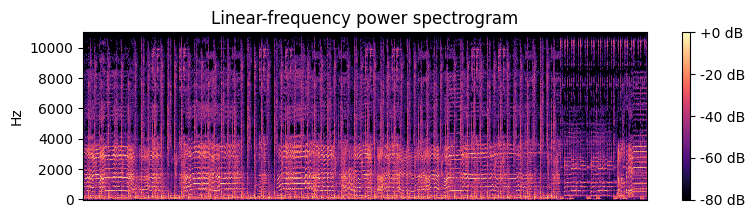

In [ ]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

### Features Extraction

In [ ]:
# Extracting MFCC's For every audio file
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, sr=None, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
# Iterate through all audio files in the specified directory path
extracted_features = []
for folder_name in ['fold1', 'fold2', 'fold3', 'fold4', 'fold5']:
    folder_path = os.path.join(audio_dataset_path, folder_name)  # Construct the full folder path
    for file_name in tqdm(os.listdir(folder_path)):
        if file_name.endswith('.mp3'):  # Process only MP3 audio files
            file_path = os.path.join(folder_path, file_name)  # Construct the full file path
            class_label = file_name.split('_')[0]  # Extract the class label from the file name
            features = features_extractor(file_path)  # Extract MFCC features
            extracted_features.append([features, class_label])  # Store the features and label in a list

100%|██████████| 100/100 [00:35<00:00,  2.85it/s]


In [ ]:
# Features extraction from all audio files (MFCC)
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["Name"]))
    final_class_labels=row["Genre"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

500it [02:33,  3.27it/s]


In [ ]:
# Converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-149.21405, 164.49658, 6.3280444, 19.775473, ...",bollypop
1,"[-88.77556, 144.83932, -20.70277, 44.49058, -1...",bollypop
2,"[-136.8446, 140.30615, -5.2928443, 37.388706, ...",bollypop
3,"[-127.26276, 144.15262, -1.860416, 48.6273, -1...",bollypop
4,"[-204.2011, 147.98465, -1.3301122, 55.277424, ...",bollypop


In [ ]:
print(extracted_features_df)

                                               feature     class
0    [-149.21405, 164.49658, 6.3280444, 19.775473, ...  bollypop
1    [-88.77556, 144.83932, -20.70277, 44.49058, -1...  bollypop
2    [-136.8446, 140.30615, -5.2928443, 37.388706, ...  bollypop
3    [-127.26276, 144.15262, -1.860416, 48.6273, -1...  bollypop
4    [-204.2011, 147.98465, -1.3301122, 55.277424, ...  bollypop
..                                                 ...       ...
495  [-111.476456, 137.04396, -50.202553, 49.08053,...      sufi
496  [-375.6764, 177.63861, -20.810356, 21.756556, ...      sufi
497  [-135.77144, 148.41608, -20.160234, 26.039093,...      sufi
498  [-114.81513, 157.42906, -15.839011, 35.73789, ...      sufi
499  [-119.59146, 158.18616, -15.23475, 34.689384, ...      sufi

[500 rows x 2 columns]


In [ ]:
# Data Frame Saving
extracted_features_df.to_csv("Music_Genre_DF.csv")

### Data Splitting and Encoding

In [ ]:
# Data Splitting
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(500, 40)

In [ ]:
y

array(['bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollypop',
       'bollypop', 'bollypop', 'bollypop', 'bollypop', 'bollyp

In [ ]:
# Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# Training Testing Sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-2.58097046e+02,  1.48515121e+02, -2.02271309e+01, ...,
         5.86654234e+00, -1.80966526e-01, -2.05560875e+00],
       [-2.23778152e+02,  1.13570435e+02, -3.12445011e+01, ...,
        -5.21393919e+00, -2.98833418e+00, -6.72671676e-01],
       [-1.50480789e+02,  1.39694427e+02, -5.62210464e+00, ...,
        -3.40861529e-01, -1.72047770e+00, -2.95275784e+00],
       ...,
       [-9.38484268e+01,  1.20805580e+02, -5.01656303e+01, ...,
         1.07325045e-02, -3.63867313e-01, -2.75370330e-01],
       [-1.55445892e+02,  1.44623978e+02,  1.30912864e+00, ...,
         4.73947430e+00,  2.25741577e+00, -1.50119841e-01],
       [-2.20442429e+02,  1.81015961e+02, -2.58319492e+01, ...,
         3.77359897e-01, -2.77677441e+00, -4.59102440e+00]], dtype=float32)

In [ ]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(500, 40)
(500, 5)
(400, 40)
(400, 5)
(100, 40)
(100, 5)


### ANN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from sklearn import metrics

In [ ]:
# No of classes
num_labels=y.shape[1]
print(num_labels)

5


In [ ]:
model=Sequential()

#first layer
model.add(Dense(1600,input_shape=(40,)))
model.add(Activation('relu'))

#second layer
model.add(Dense(1200))
model.add(Activation('relu'))

#third layer
model.add(Dense(800))
model.add(Activation('elu'))

#fourth layer
model.add(Dense(400))
model.add(Activation('elu'))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 1600)              65600     
                                                                 
 activation_14 (Activation)  (None, 1600)              0         
                                                                 
 dense_28 (Dense)            (None, 1200)              1921200   
                                                                 
 activation_15 (Activation)  (None, 1200)              0         
                                                                 
 dense_29 (Dense)            (None, 800)               960800    
                                                                 
 activation_16 (Activation)  (None, 800)               0         
                                                                 
 dense_30 (Dense)            (None, 400)              

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
# Model training
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [ ]:
num_epochs = 60
num_batch_size = 5

checkpointer = ModelCheckpoint(filepath='saved_models/music_genre_ann.h5', verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/60
80/80 [==============================] - ETA: 0s - loss: 4.4020 - accuracy: 0.3900
Epoch 1: val_loss improved from inf to 1.97931, saving model to saved_models/music_genre.h5
80/80 [==============================] - 5s 49ms/step - loss: 4.4020 - accuracy: 0.3900 - val_loss: 1.9793 - val_accuracy: 0.4300
Epoch 2/60
80/80 [==============================] - ETA: 0s - loss: 1.2482 - accuracy: 0.5600
Epoch 2: val_loss improved from 1.97931 to 1.10131, saving model to saved_models/music_genre.h5
80/80 [==============================] - 5s 60ms/step - loss: 1.2482 - accuracy: 0.5600 - val_loss: 1.1013 - val_accuracy: 0.5900
Epoch 3/60
80/80 [==============================] - ETA: 0s - loss: 0.9841 - accuracy: 0.6300
Epoch 3: val_loss did not improve from 1.10131
80/80 [==============================] - 4s 44ms/step - loss: 0.9841 - accuracy: 0.6300 - val_loss: 1.1693 - val_accuracy: 0.6200
Epoch 4/60
80/80 [==============================] - ETA: 0s - loss: 0.8374 - accuracy: 0.6825

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8500000238418579


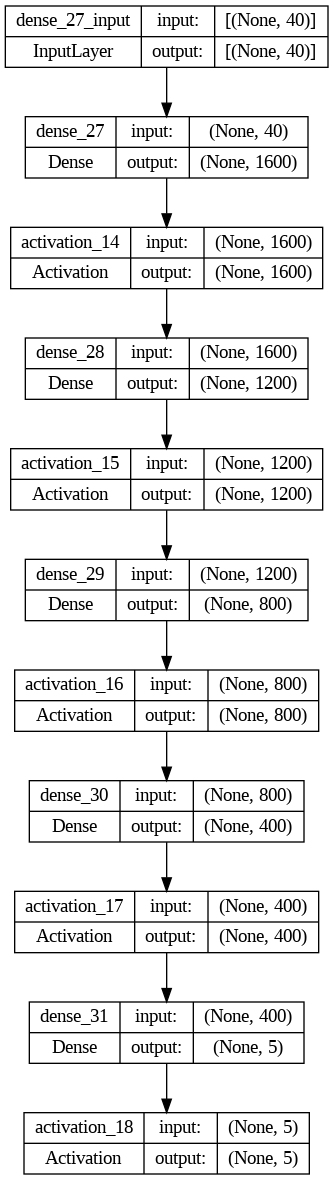

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

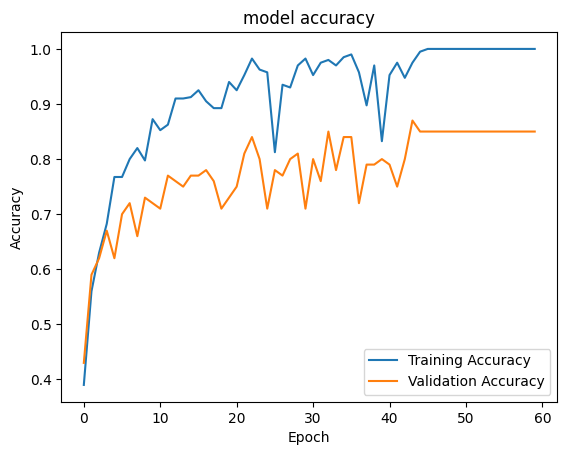

In [ ]:
# Extract the training and validation accuracy values from the model's history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Generate a line plot of the training and validation accuracy over the 50 epochs
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

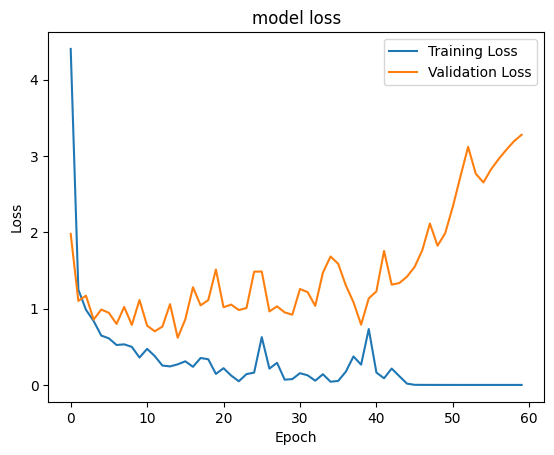

In [ ]:
# Extract the training and validation loss values from the model's history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Generate a line plot of the training and validation loss over the 50 epochs
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Convolutional Neural Network (CNN)

In [ ]:
X_train_cnn = X_train.reshape(X_train.shape[0], 10, 4, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 10, 4, 1)

In [ ]:
print(X_train_cnn.shape)
print(X_test_cnn.shape)

(400, 10, 4, 1)
(100, 10, 4, 1)


In [ ]:
model2 = Sequential()

model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(10, 4, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model2.add(Conv2D(128, kernel_size=(1, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model2.add(Conv2D(256, kernel_size=(1, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model2.add(Conv2D(512, kernel_size=(1, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model2.add(Flatten())

model2.add(Dense(1600, activation='relu'))
model2.add(Dense(1200, activation='relu'))
model2.add(Dense(800, activation='elu'))
model2.add(Dense(400, activation='elu'))
model2.add(Dense(num_labels, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 8, 2, 64)          640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 1, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 1, 128)         8320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 1, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 1, 256)         33024     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 1, 1, 256)       

In [ ]:
model2.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
num_epochs = 100
num_batch_size = 5

checkpointer = ModelCheckpoint(filepath='saved_models/music_genre_cnn.h5', verbose=1, save_best_only=True)
start = datetime.now()

history_cnn = model2.fit(X_train_cnn, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test_cnn, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
80/80 [==============================] - ETA: 0s - loss: 1.3546 - accuracy: 0.4450
Epoch 1: val_loss improved from inf to 1.32822, saving model to saved_models/music_genre.h5
80/80 [==============================] - 7s 85ms/step - loss: 1.3546 - accuracy: 0.4450 - val_loss: 1.3282 - val_accuracy: 0.3600
Epoch 2/100
80/80 [==============================] - ETA: 0s - loss: 1.3208 - accuracy: 0.4800
Epoch 2: val_loss improved from 1.32822 to 1.26023, saving model to saved_models/music_genre.h5
80/80 [==============================] - 8s 95ms/step - loss: 1.3208 - accuracy: 0.4800 - val_loss: 1.2602 - val_accuracy: 0.4500
Epoch 3/100
80/80 [==============================] - ETA: 0s - loss: 1.1503 - accuracy: 0.5125
Epoch 3: val_loss did not improve from 1.26023
80/80 [==============================] - 9s 109ms/step - loss: 1.1503 - accuracy: 0.5125 - val_loss: 1.3209 - val_accuracy: 0.5100
Epoch 4/100
80/80 [==============================] - ETA: 0s - loss: 1.1160 - accuracy: 0

In [ ]:
test_accuracy=model2.evaluate(X_test_cnn,y_test,verbose=0)
print(test_accuracy[1])

0.7400000095367432


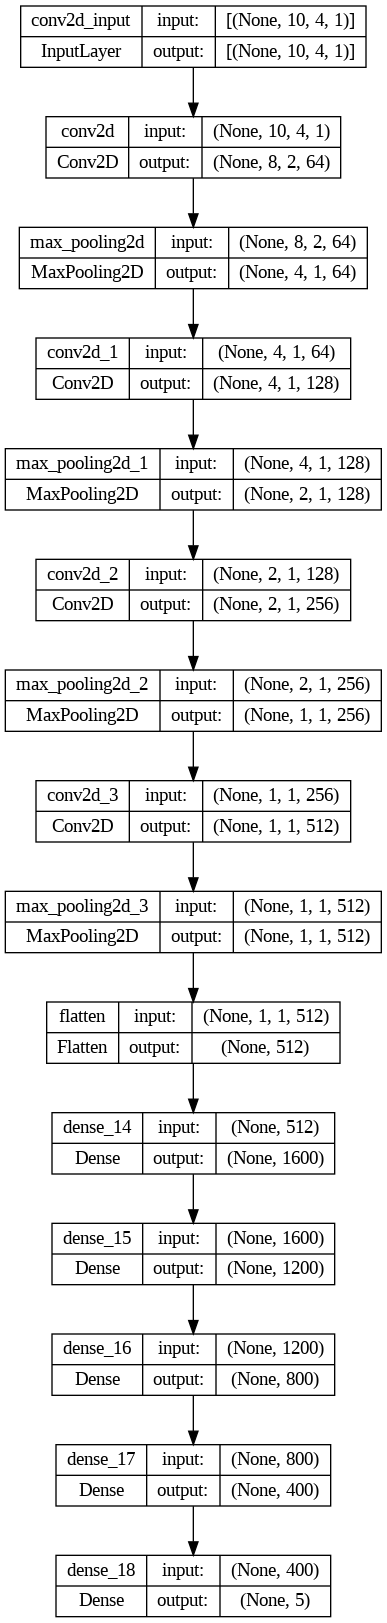

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model_cnn.png', show_shapes=True, show_layer_names=True)

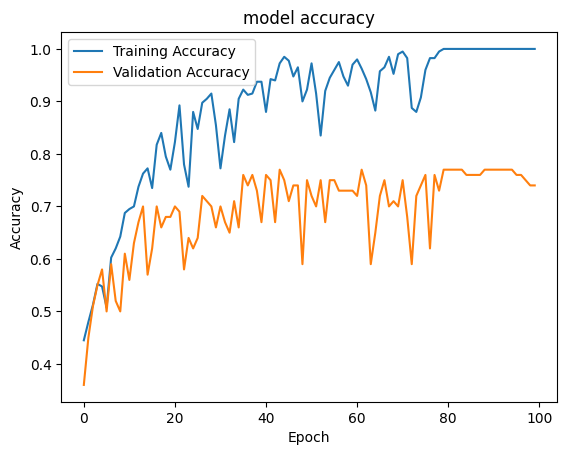

In [ ]:
# Extract the training and validation accuracy values from the model's history
train_acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']

# Generate a line plot of the training and validation accuracy over the 50 epochs
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

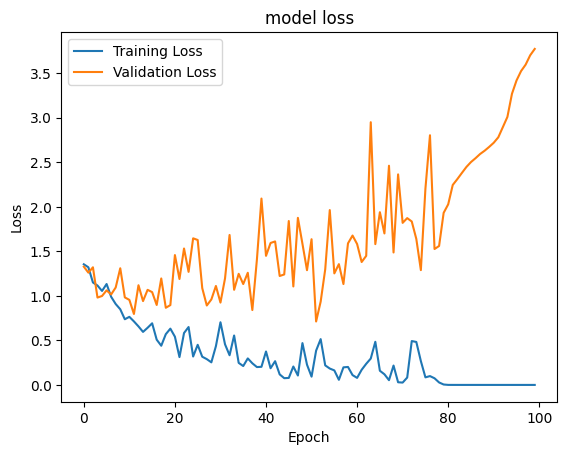

In [ ]:
# Extract the training and validation loss values from the model's history
train_loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

# Generate a line plot of the training and validation loss over the 50 epochs
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Create random forest classifier
clf_rf = RandomForestClassifier(n_estimators=300, random_state=60)

# Train classifier on training data
clf_rf.fit(X_train, y_train)

# Evaluate classifier on testing data
predictions = clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.46


### Boosted Random Forest

In [ ]:
# create a random forest classifier
rfc = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=40)

# create an AdaBoost classifier using the random forest classifier as the base estimator
ada = AdaBoostClassifier(estimator=rfc, n_estimators=200, learning_rate=0.1, random_state=0)

# convert to 1D array
y_train_ada = np.argmax(y_train, axis=1)
y_test_ada = np.argmax(y_test, axis=1)

# fit the AdaBoost classifier to the training data
ada.fit(X_train, y_train_ada)

# make predictions on the testing data
y_pred = ada.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test_ada, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.79


### RNN - LSTM

In [ ]:
from keras.layers import LSTM

In [ ]:
X_train_rnn = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

print(X_train_rnn.shape)
print(X_test_rnn.shape)

(400, 1, 40)
(100, 1, 40)


In [ ]:
# Define the RNN-LSTM model

model3 = Sequential()

model3.add(LSTM(512, input_shape=(1,40), activation='tanh', return_sequences=True))

model3.add(LSTM(256, activation='tanh', return_sequences=True))

model3.add(LSTM(128, activation='tanh'))

model3.add(Dense(64, activation='relu'))

model3.add(Dense(y.shape[1], activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 512)            1132544   
                                                                 
 lstm_11 (LSTM)              (None, 1, 256)            787456    
                                                                 
 lstm_12 (LSTM)              (None, 128)               197120    
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 5)                 325       
                                                                 
Total params: 2,125,701
Trainable params: 2,125,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model

num_epochs = 50
num_batch_size = 5

history_rnn = model3.fit(X_train_rnn, y_train, epochs=num_epochs, batch_size=num_batch_size, validation_data=(X_test_rnn, y_test))

Epoch 1/50
80/80 [==============================] - 10s 53ms/step - loss: 1.3343 - accuracy: 0.4625 - val_loss: 1.0586 - val_accuracy: 0.5600
Epoch 2/50
80/80 [==============================] - 3s 37ms/step - loss: 0.9338 - accuracy: 0.6200 - val_loss: 0.8814 - val_accuracy: 0.5800
Epoch 3/50
80/80 [==============================] - 4s 51ms/step - loss: 0.7596 - accuracy: 0.7025 - val_loss: 1.2904 - val_accuracy: 0.5400
Epoch 4/50
80/80 [==============================] - 3s 39ms/step - loss: 0.6499 - accuracy: 0.7625 - val_loss: 1.0568 - val_accuracy: 0.5900
Epoch 5/50
80/80 [==============================] - 3s 37ms/step - loss: 0.6358 - accuracy: 0.7600 - val_loss: 0.9968 - val_accuracy: 0.6400
Epoch 6/50
80/80 [==============================] - 3s 36ms/step - loss: 0.5868 - accuracy: 0.7675 - val_loss: 0.9894 - val_accuracy: 0.5900
Epoch 7/50
80/80 [==============================] - 3s 42ms/step - loss: 0.5091 - accuracy: 0.8000 - val_loss: 0.8951 - val_accuracy: 0.7000
Epoch 8/50
8

In [ ]:
# Evaluate the model
accuracy_rnn = model3.evaluate(X_test_rnn, y_test)
print("Accuracy:", accuracy_rnn[1])

4/4 [==============================] - 1s 10ms/step - loss: 0.8192 - accuracy: 0.8500
Accuracy: 0.8500000238418579


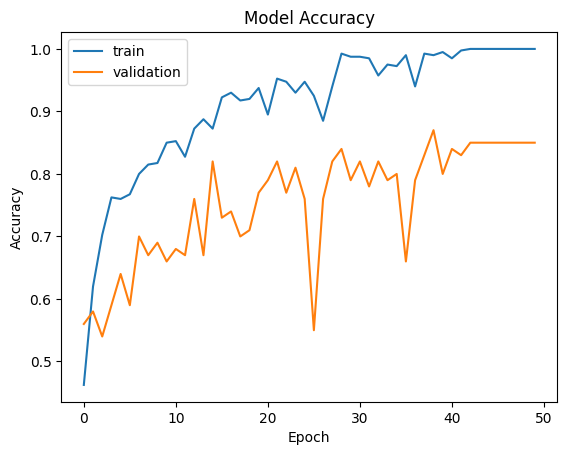

In [ ]:
# plot the training and validation accuracy over epochs
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

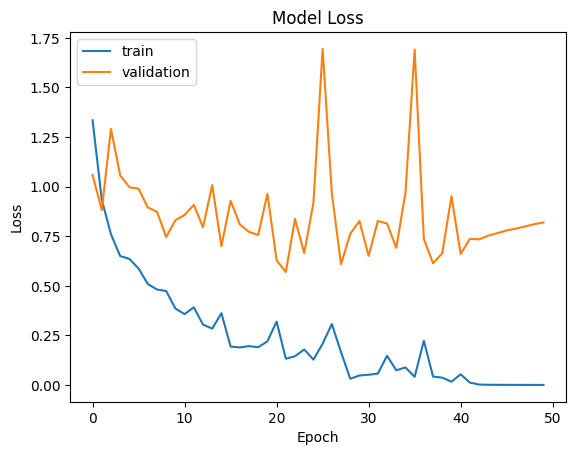

In [ ]:
# plot the training and validation accuracy over epochs
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Testing Some NEW Audio Data

In [ ]:
filename="/content/drive/MyDrive/Capstone/Indian Music Genre Dataset/sample/sample 1 (carnatic).mp3"
audio, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

In [ ]:
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features.shape)
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print('Predicted Label:',predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class[0]

(1, 40)
1/1 [==============================] - 0s 24ms/step
Predicted Label: [1]


'carnatic'

In [ ]:
mfccs_scaled_features.shape

(40,)